# 원하는 색상만 얻어보기

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import subprocess as sp
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

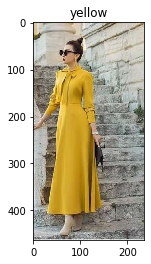

(463, 236, 3)
(463, 236)


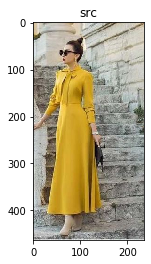

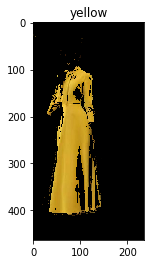

(463, 472, 3)


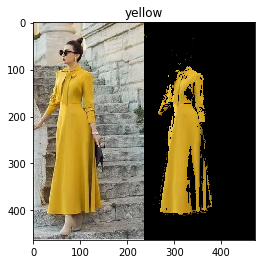

In [2]:
yellow = cv2.imread('yellow.jpg')
imshow("yellow", yellow )   
    
hsv = cv2.cvtColor(yellow, cv2.COLOR_BGR2HSV)
print(hsv.shape)
h = hsv[:,:,0]
s = hsv[:,:,1]
print(h.shape)    
    
dest = yellow.copy()
for r in range(yellow.shape[0]) :
    for c in range(yellow.shape[1]) :
        if h[r,c] >= 10 and h[r,c] <= 50 and   s[r,c] >= 170 and s[r,c] <= 230 : 
            dest[r,c, :] =  yellow[r,c,:]  #[255,255,255]
        else :
            dest[r,c, :] = [0,0,0]         
imshow("src", yellow)
imshow("yellow", dest)

dest2 = np.hstack((yellow, dest ))
print(dest2.shape)
imshow("yellow", dest2)   

# 크로마키 제거 & 크로마키 배경 변경

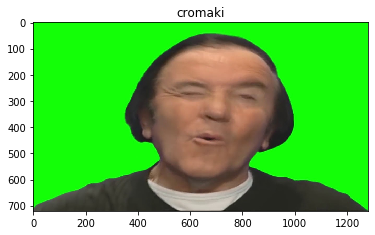

In [3]:
img = cv2.imread('cromaki.jpg')
imshow('cromaki', img)

In [4]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
print(hsv.shape)
# print(hsv)
h = hsv[:,:,0]
print(h)
s = hsv[:,:,1]
print(s)
print(h.shape)

(720, 1280, 3)
[[ 58  58  58 ...  58  58  58]
 [ 58  58  58 ...  58  58  58]
 [ 58  58  58 ...  58  58  58]
 ...
 [  0  75  75 ...  61  61  61]
 [140 120 120 ...  64  65  64]
 [140 140 126 ...  69  67  67]]
[[248 248 248 ... 248 248 248]
 [248 248 248 ... 248 248 248]
 [248 248 248 ... 248 248 248]
 ...
 [  0   6   6 ... 168 169 166]
 [  9   6   6 ... 147 149 158]
 [  9   9  15 ... 138 143 151]]
(720, 1280)


In [5]:
def chromakey(img, background) :    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    patch = hsv[0:20, 0:20, :]
    hsv = cv2.resize(hsv, dsize=(320,240))
    background = cv2.resize(background, dsize=(320,240))
    minH = np.min(patch[:,:,0])*0.9
    maxH = np.max(patch[:,:,0])*1.1
    minS = np.min(patch[:,:,1])*0.9
    maxS = np.max(patch[:,:,1])*1.1
    h = hsv[:,:,0]
    s = hsv[:,:,1]
    dest = hsv.copy()
    for r in range(hsv.shape[0]) :
        for c in range(hsv.shape[1]) :
            if h[r,c] >= minH and h[r,c] <= maxH and   s[r,c] >= minS  and s[r,c] <= maxS : 
                dest[r,c, :] = background[r,c,:]
            else :
                dest[r,c, :] =  hsv[r,c,:]
    return dest

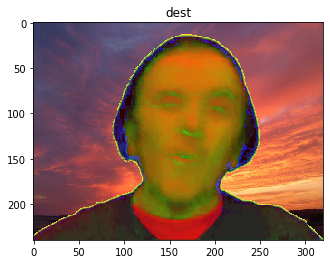

In [6]:
background = cv2.imread('sun.jpg')

dest = chromakey(img, background)
imshow('dest', dest)

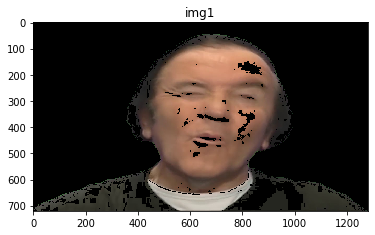

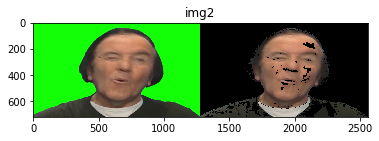

In [8]:
img1 = img.copy()
for r in range(img.shape[0]):
    for c in range(img.shape[1]):
        if h[r,c] >= 70 & h[r,c] <= 88 & s[r,c] >= 200 & s[r,c] <= 240:
            img1[r,c, :] = img[r, c, :]
        else:
            img1[r,c,:] = [0,0,0]
imshow("img1", img1)

img2 = np.hstack((img, img1))
imshow('img2', img2)